# Analysis of Suicide Rates

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black

In [2]:
train = pd.read_csv(r'Input\Suicide.csv')
train.shape

(27820, 12)

In [3]:
train.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,nan,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,nan,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,nan,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,nan,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,nan,"2,156,624,900",796,Boomers


In [4]:
train.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
train['country'].value_counts()

Austria                   382
Iceland                   382
Mauritius                 382
Netherlands               382
United Kingdom            372
Israel                    372
Greece                    372
Ecuador                   372
Belgium                   372
Spain                     372
Italy                     372
Malta                     372
Chile                     372
Colombia                  372
United States             372
Puerto Rico               372
Japan                     372
Mexico                    372
Singapore                 372
Brazil                    372
Republic of Korea         372
Argentina                 372
Luxembourg                372
Australia                 360
France                    360
Bulgaria                  360
Guatemala                 360
Costa Rica                360
Norway                    360
Ireland                   360
                         ... 
Estonia                   252
Slovenia                  252
Belarus   

In [6]:
train.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.00,27820.00,27820.00,27820.00,8364.00,27820.00
mean,2001.26,242.57,1844793.62,12.82,0.78,16866.46
std,8.47,902.05,3911779.44,18.96,0.09,18887.58
min,1985.00,0.00,278.00,0.00,0.48,251.00
25%,1995.00,3.00,97498.50,0.92,0.71,3447.00
50%,2002.00,25.00,430150.00,5.99,0.78,9372.00
75%,2008.00,131.00,1486143.25,16.62,0.85,24874.00
max,2016.00,22338.00,43805214.00,224.97,0.94,126352.00


In [7]:
train.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [8]:
train=train.rename(columns={'suicides_no':'SuicidesNo','suicides/100k pop':'SuicidesPer100k',
                            'country-year':'CountryYear',' gdp_for_year ($) ':'GdpForYearUSD','gdp_per_capita ($)':'GdpPerCapitaUSD'})
train.columns

Index(['country', 'year', 'sex', 'age', 'SuicidesNo', 'population',
       'SuicidesPer100k', 'CountryYear', 'HDI for year', 'GdpForYearUSD',
       'GdpPerCapitaUSD', 'generation'],
      dtype='object')

In [9]:
train.isnull().sum().sort_values(ascending=False)

HDI for year       19456
generation             0
GdpPerCapitaUSD        0
GdpForYearUSD          0
CountryYear            0
SuicidesPer100k        0
population             0
SuicidesNo             0
age                    0
sex                    0
year                   0
country                0
dtype: int64

In [10]:
nulls_HDI_percentage = train.isnull().sum().sort_values(ascending=False)[0] / train.shape[0]*100
print(f'There is {round(nulls_HDI_percentage,2)} % of nulls in HDI for year column')

There is 69.94 % of nulls in HDI for year column


In [11]:
# We should drop that columns!

In [12]:
train.drop(['HDI for year'],axis=1,inplace=True)

In [13]:
train.columns

Index(['country', 'year', 'sex', 'age', 'SuicidesNo', 'population',
       'SuicidesPer100k', 'CountryYear', 'GdpForYearUSD', 'GdpPerCapitaUSD',
       'generation'],
      dtype='object')

In [14]:
# We can also drop CountryYear
train['CountryYear'].sample(10)

11684      Iceland1985
19406     Portugal1989
18863     Paraguay2012
9755       Germany1993
13463        Japan1993
2432       Bahamas1997
6979        Cyprus2007
20656      Romania1993
22846     Slovakia1998
15231    Lithuania2010
Name: CountryYear, dtype: object

In [15]:
train.drop(['CountryYear'],axis=1,inplace=True)

In [16]:
min_year,max_year = min(train['year']),max(train['year'])
print(f'Minimal Year in our dataset : {min_year}. Maximal Year in our dataset: {max_year}.')

Minimal Year in our dataset : 1985. Maximal Year in our dataset: 2016.


In [17]:
suicide_1985 = train.groupby(['year','country'])['SuicidesNo'].sum().sort_values(ascending=False)[min_year]
suicide_2016 = train.groupby(['year','country'])['SuicidesNo'].sum().sort_values(ascending=False)[max_year]

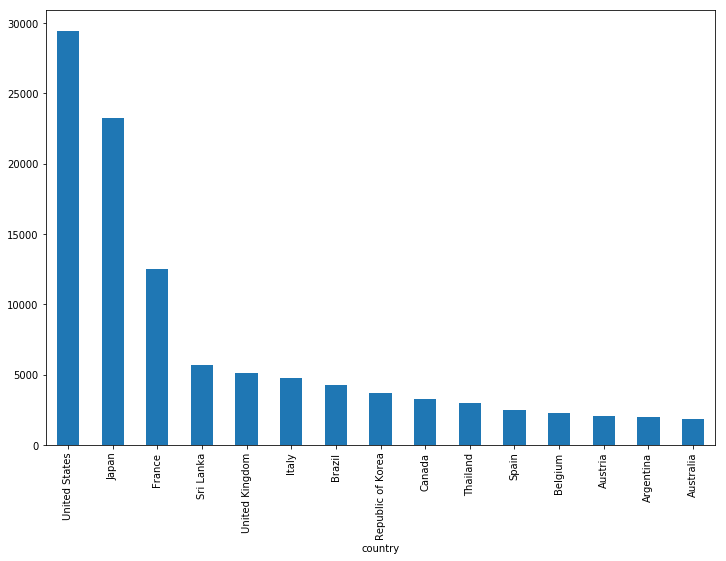

In [18]:
plt.figure(figsize=(12,8))
suicide_1985[:15].plot(kind='bar')

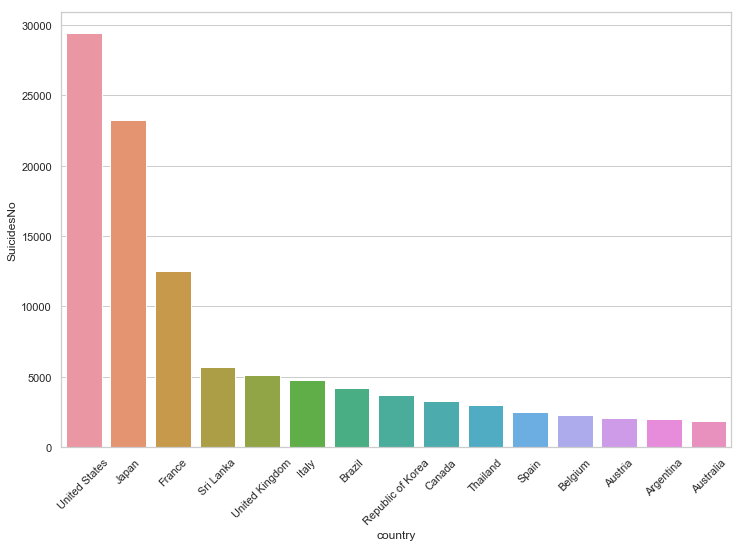

In [27]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.barplot(x=suicide_1985[:15].index, y=suicide_1985[:15])
plt.xticks(rotation=45);

In [29]:
population_1985 = train.groupby(['year','country'])['population'].sum().sort_values(ascending=False)[min_year]
population_2016 = train.groupby(['year','country'])['population'].sum().sort_values(ascending=False)[max_year]

In [30]:
df1 = pd.concat([population_1985,suicide_1985],keys='country',axis=1).rename(columns={'c':'population','o':'suicides'})
df1['ratio'] = df1['suicides']/df1['population']*100
df1['ratio'].sort_values(ascending=False)[:5]

Sri Lanka   0.04
Austria     0.03
Suriname    0.02
Belgium     0.02
France      0.02
Name: ratio, dtype: float64

In [31]:
countries_1985 = train.groupby(['year','country'])['population'].sum().sort_values(ascending=False)[min_year].index.tolist()

In [32]:
train.columns

Index(['country', 'year', 'sex', 'age', 'SuicidesNo', 'population',
       'SuicidesPer100k', 'GdpForYearUSD', 'GdpPerCapitaUSD', 'generation'],
      dtype='object')

In [33]:
cols = ['country','year','sex','age','SuicidesPer100k']
train_1 = train[cols]
train_1.head()

,country,year,sex,age,SuicidesPer100k
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


In [34]:
def decades(year):
    if year >= 1987 and year <= 1996:
        return '1987-1996'
    elif year >= 1997 and year <= 2006:
        return '1997-2006'
    else:
        return '2007-2016'

In [35]:
train_1['decade'] = train_1['year'].apply(decades)
train_1.sample(5)

,country,year,sex,age,SuicidesPer100k,decade
25980,Turkmenistan,2008,female,55-74 years,3.05,2007-2016
13005,Italy,2003,male,55-74 years,14.89,1997-2006
21214,Russian Federation,2012,male,35-54 years,44.69,2007-2016
26059,Turkmenistan,2015,male,55-74 years,3.10,2007-2016
16266,Mauritius,1992,male,75+ years,45.45,1987-1996


In [51]:
train_age = train_1.groupby(["age"]).sum()

In [55]:
train_age = train_age.sort_values(by='SuicidesPer100k')

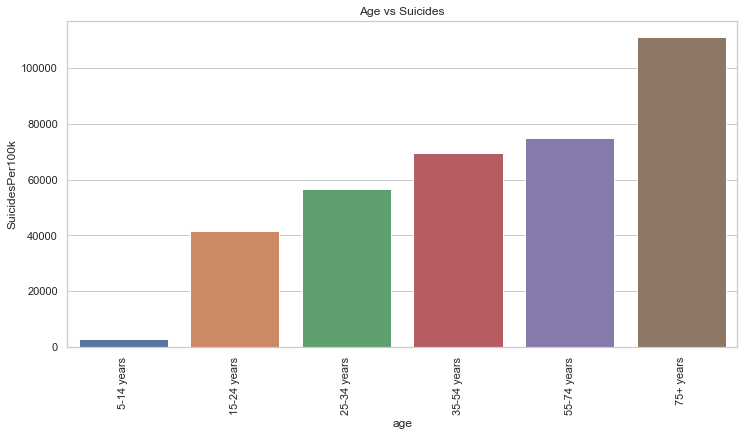

In [57]:
# Number of suicides per age:

plt.figure(figsize=(12,6))
sns.barplot(x = "age", y = "SuicidesPer100k",data = train_age.reset_index()).set_title("Age vs Suicides")
plt.xticks(rotation = 90);

As we can see on chart above that in as the age increases we have more suicides per 100 k population

In [62]:
train_sex = train_1.groupby(["sex"]).sum()

Text(0.5, 1.0, 'Sex vs Suicides')

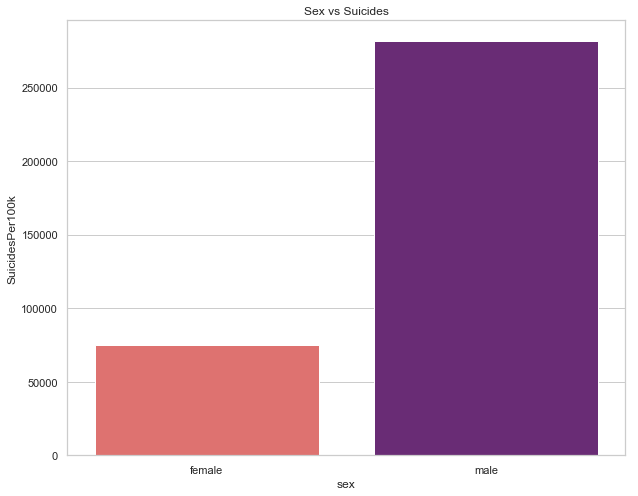

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x = "sex", y = "SuicidesPer100k",data = train_sex.reset_index(),palette='magma_r').set_title("Sex vs Suicides")
#plt.xticks(rotation = 90);

In [92]:
f_s = round(train_sex['SuicidesPer100k']['female'])
m_s = round(train_sex['SuicidesPer100k']['male'])
print(f'Male suicides   {m_s}\nFemale suicides {f_s}')
print(f'Suicides ratio: {round(m_s/f_s,2)} males/females')
print('We can see that there is 3,75 times more suicides in male group then in female.')

Male suicides   281529.0
Female suicides 75015.0
Suicides ratio: 3.75 males/females
We can see that there is 3,75 times more suicides in male group then in female.


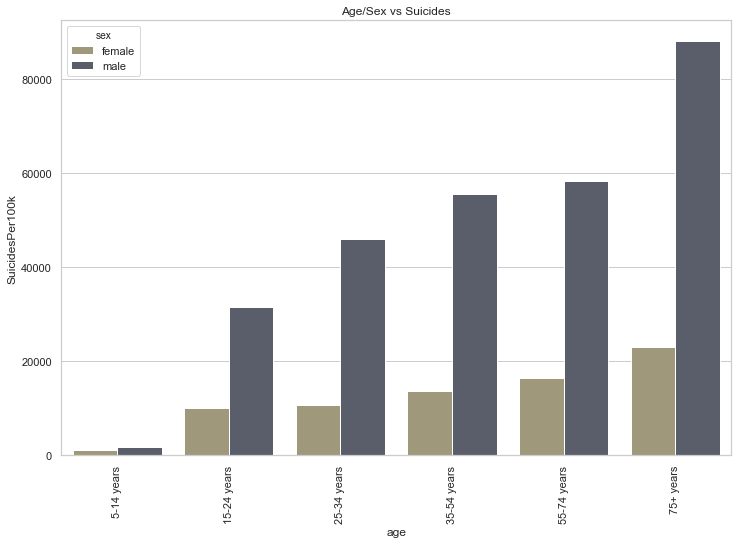

In [105]:
# Now let's look how it looks like in sex/age 
train_sex_age = train_1.groupby(["sex",'age']).sum()
train_sex_age =train_sex_age.sort_values(by='SuicidesPer100k')
plt.figure(figsize=(12,8))
sns.barplot(x = "age", y = "SuicidesPer100k", hue = "sex",data = train_sex_age.reset_index(),palette='cividis_r').set_title("Age/Sex vs Suicides")
plt.xticks(rotation = 90);

Within age increase suicide rates is increasing irrespective in males and females.

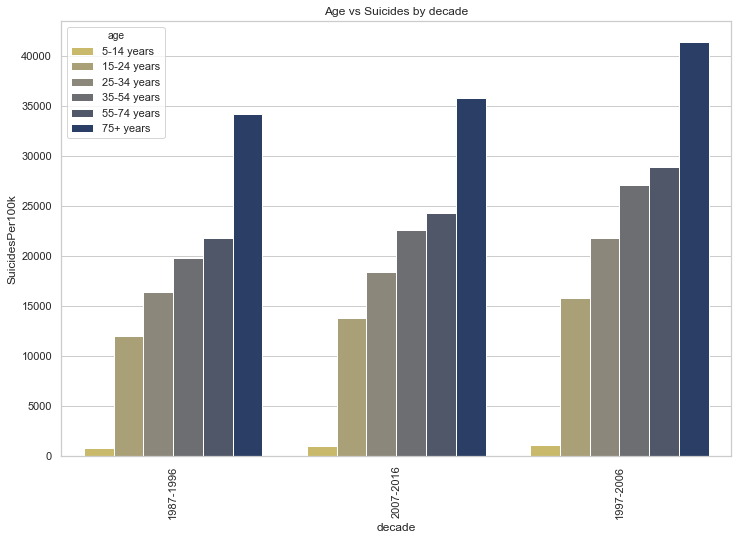

In [145]:
train_sex_age_decade = train_1.groupby(['age','decade']).sum().sort_values(by='SuicidesPer100k')
#train_sex_age_decade

plt.figure(figsize=(12,8))
sns.barplot(x = "decade", y = "SuicidesPer100k",hue='age',data = train_sex_age_decade.reset_index(),palette='cividis_r').set_title("Age vs Suicides by decade")
plt.xticks(rotation = 90);

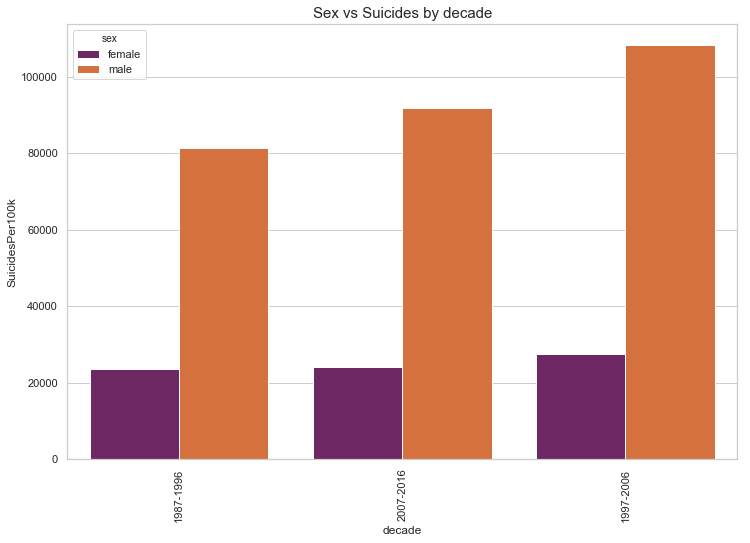

In [144]:
train_sex_decade = train_1.groupby(['sex','decade']).sum().sort_values(by='SuicidesPer100k')
#train_sex_age_decade

plt.figure(figsize=(12,8))
sns.barplot(x = "decade", y = "SuicidesPer100k",hue='sex',data = train_sex_decade.reset_index(),palette='inferno').set_title("Sex vs Suicides by decade",fontsize=15)
plt.xticks(rotation = 90);

Looking at age, sex we can see that every decade suicides ratio is increasing

In [151]:
countries = train_1.groupby('country').sum().sort_values(by='SuicidesPer100k')
countries['SuicidesPer100k'].sample(5)

country
Costa Rica              2553.72
Saint Kitts and Nevis      0.00
Israel                  3329.97
Italy                   3168.87
Romania                 4171.55
Name: SuicidesPer100k, dtype: float64

### Analysis suicides by country

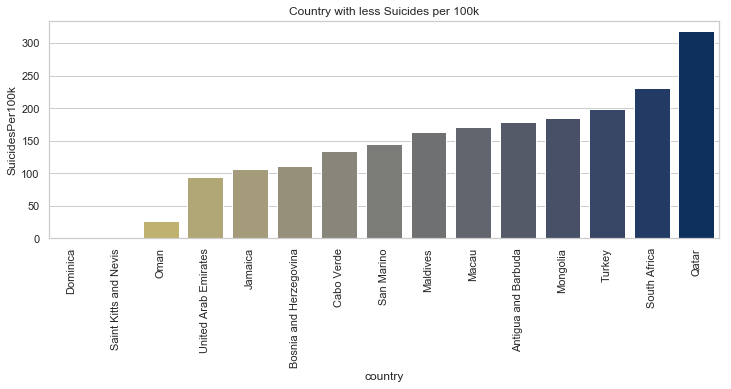

In [178]:
plt.figure(figsize=(12,4))
sns.barplot(x = "country", y = "SuicidesPer100k",data = countries[:15].reset_index(),palette='cividis_r').set_title("Country with less Suicides per 100k")
plt.xticks(rotation = 90);

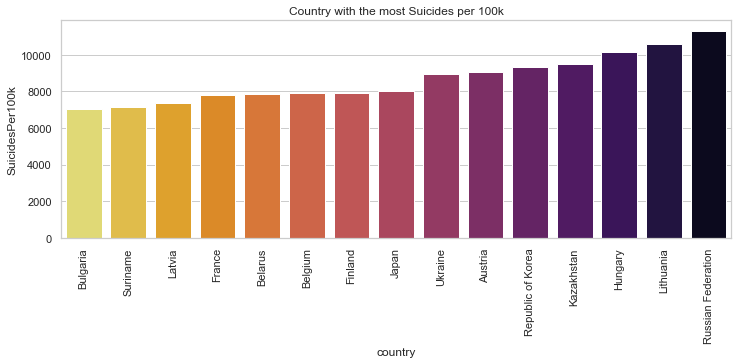

In [177]:
plt.figure(figsize=(12,4))
sns.barplot(x = "country", y = "SuicidesPer100k",data = countries[-15:].reset_index(),palette='inferno_r').set_title("Country with the most Suicides per 100k")
plt.xticks(rotation = 90);

In [180]:
train_1.head()

,country,year,sex,age,SuicidesPer100k,decade
0,Albania,1987,male,15-24 years,6.71,1987-1996
1,Albania,1987,male,35-54 years,5.19,1987-1996
2,Albania,1987,female,15-24 years,4.83,1987-1996
3,Albania,1987,male,75+ years,4.59,1987-1996
4,Albania,1987,male,25-34 years,3.28,1987-1996


In [186]:
country_decade = train_1.groupby(['decade','country'])['SuicidesPer100k'].sum()
decades = train_1['decade'].unique().tolist()

In [190]:
decades

['1987-1996', '1997-2006', '2007-2016']

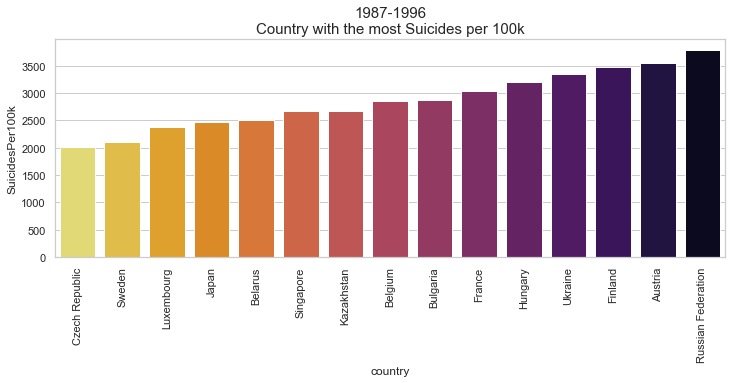

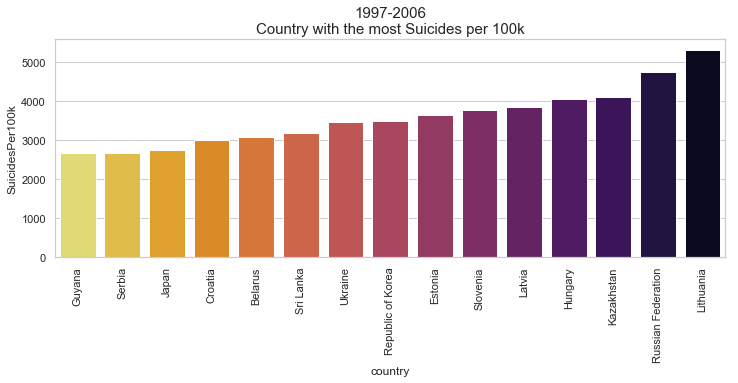

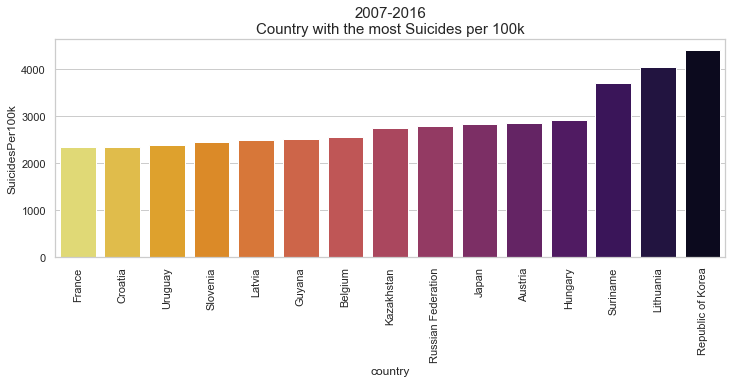

In [198]:
for i in decades:
    #country_decade[i]
    plt.figure(figsize=(12,4))
    sns.barplot(x = "country", y = "SuicidesPer100k",data = country_decade[i].sort_values(ascending=True)[-15:].reset_index(),palette='inferno_r').set_title(f"{i}\nCountry with the most Suicides per 100k",fontsize=15)
    plt.xticks(rotation = 90);

In [208]:
df = pd.DataFrame()
for i in decades:
    df[i] = (country_decade[i].sort_values(ascending=False)[:5])
df

,1987-1996,1997-2006,2007-2016
country,,,
Russian Federation,3795.23,4728.80,nan
Austria,3556.15,nan,2859.05
Finland,3476.27,nan,nan
Ukraine,3350.67,nan,nan
Hungary,3196.51,4053.57,2905.99


In [222]:
train_1 = train_1[['country','sex','age','decade','SuicidesPer100k']]

In [224]:
danger = train_1.groupby(["country","decade"]).sum().reset_index()
danger.head()

,country,decade,SuicidesPer100k
0,Albania,1987-1996,264.62
1,Albania,1997-2006,481.58
2,Albania,2007-2016,178.56
3,Antigua and Barbuda,1987-1996,32.24
4,Antigua and Barbuda,1997-2006,123.30


In [239]:
three_gen = danger.country.value_counts().reset_index()
three_gen.columns = ["country", "counts"]
three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()
len(three_gen_countries)

84

In [241]:
decades_3 = danger.country.value_counts().reset_index()
decades_3 = decades_3[decades_3['country']==3]['index'].tolist()